<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [154]:
%load_ext autoreload
%autoreload 2
import src
import sqlalchemy as sql
import pymysql

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt

In [3]:
from src.enm import *
from src.utils import *


In [4]:
import pickle
with open('../data/interim/pcc.pickle','rb') as handle:
    e = pickle.load(handle)

In [5]:
e = Enm('pcc')
e.read_network('../data/interim/costanzo_pcc_ALL',sep=',')
e.gnm_analysis()

In [126]:
e.figure_path = '../reports/figures/pcc_0511/'

In [257]:
strain_ids = pd.read_csv('../data/interim/strain_ids_with_experiment_count_all.csv')
combined_df = pd.merge(e.df, strain_ids, left_on='orf_name',right_on='Allele Gene name')
combined_df['group']=np.where(combined_df.cat.isna(),'essential','nonessential')

In [89]:
combined_df['sensor']=np.where(combined_df['sens']>np.quantile(combined_df['sens'],0.99),True,False)

In [103]:
combined_df = combined_df.fillna({'cat':'essential'})
combined_df['cat_2']=combined_df['cat']
combined_df['cat_3']=combined_df['cat']
combined_df['cat_4']=combined_df['cat']

cat_change_dict = {'essential': 'Essential',
                  'na.nq.nxes':'Nonessential query and array',
                  'nxes.only':'Nonessential query crossed with Essential',
                  'nq.nxes':'Nonessential query',
                  'na.nq':'Others',
                  'na.nxes':'Others',
                  'nq.only':'Others',
                  'na.only':'Others'}
cat_change_dict2 = {'essential': 'Essential',
                  'na.nq.nxes':'Nonessential query and array',
                  'nxes.only':'Nonessential query crossed with Essential',
                  'nq.nxes':'Nonessential query',
                  'na.nq':' array and queried vs only nonessentials ',
                  'na.nxes':' array and queried vs only essentials ',
                  'nq.only':'Nonessential genes that were only used as query ',
                  'na.only':'Nonessential genes that were only used as array '}

cat_change_dict3 = {'essential': 'E',
                  'na.nq.nxes':'Nonessential query and array',
                  'nxes.only':'E',
                  'nq.nxes':'E',
                  'na.nq':'Nonessential query and array',
                  'na.nxes':'Nonessential query and array',
                  'nq.only':'E',
                  'na.only':'E'}
#combined_df.replace({'cat_2': cat_change_dict})
combined_df['cat_2']= combined_df['cat_2'].map(cat_change_dict) 
combined_df['cat_3']= combined_df['cat_3'].map(cat_change_dict2) 
combined_df['cat_4']= combined_df['cat_4'].map(cat_change_dict3) 
combined_df.loc[:,['sensor','cat_4']]

,sensor,cat_4
0,False,E
1,False,Nonessential query and array
2,False,E
3,False,E
4,False,Nonessential query and array
...,...,...
5080,False,E
5081,False,Nonessential query and array
5082,False,E
5083,False,E


In [104]:
pd.crosstab(combined_df['sensor'],combined_df['cat_4']).T

sensor,False,True
cat_4,,
E,2458,21
Nonessential query and array,2576,30


In [106]:
from scipy.stats import chi2_contingency, fisher_exact
fisher_exact(pd.crosstab(combined_df['sensor'],combined_df['cat_4']).T)

(1.3631322094055014, 0.3248440860442148)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0.5, 1, 'sss')

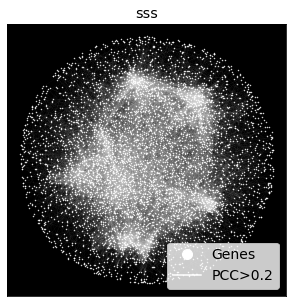

In [5]:
e.plot_network_spring(plot_legend=True)
plt.title('sss')

No handles with labels found to put in legend.


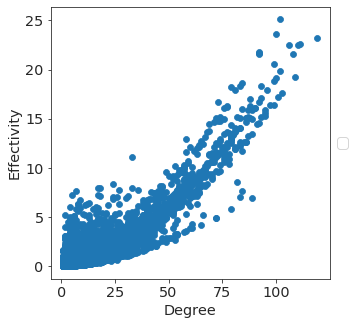

In [65]:
e.plot_scatter(x= 'deg',y = 'eff', x_label='Degree', y_label='Effectivity')

No handles with labels found to put in legend.


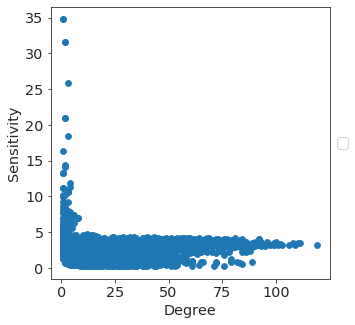

In [66]:
e.plot_scatter(x= 'deg',y = 'sens', x_label='Degree', y_label='Sensitivity')

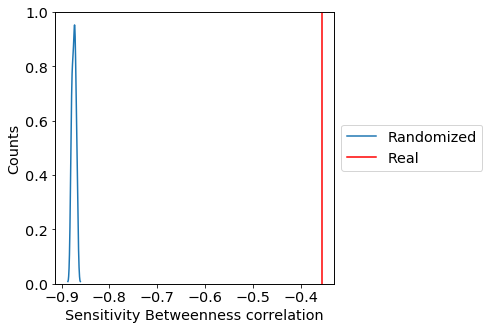

In [134]:
e.plot_correlation_density(x='sens',y='btw',correlation='spearman')

In [49]:
import numpy as np 
import pandas as pd 
np.save('../data/interim/arr.npy',e.arr)
e.rewire_df.to_csv('../data/interim/rewire_df.csv')

In [68]:
e.simulate_rewire(rewired=True,rewire_df_name='../data/interim/rewire_df.csv',arr_name='../data/interim/arr.npy')

In [70]:
e.rewire_df

,Unnamed: 0,eff_deg_pearson,sens_deg_pearson,eff_deg_spearman,sens_deg_spearman,eff_btw_pearson,sens_btw_pearson,eff_btw_spearman,sens_btw_spearman,eff_trans_pearson,sens_trans_pearson,eff_trans_spearman,sens_trans_spearman
0,0,0.487307,-0.373525,0.667655,-0.976989,0.670310,-0.256169,0.839187,-0.872512,-0.002992,-0.119081,0.325806,-0.515596
1,0,0.481426,-0.436771,0.653933,-0.977892,0.662838,-0.305215,0.829599,-0.872611,0.014168,-0.115772,0.311586,-0.529649
2,0,0.545752,-0.256504,0.686744,-0.977603,0.718909,-0.162712,0.853664,-0.868216,0.028677,-0.084234,0.347140,-0.537181
3,0,0.478133,-0.427167,0.667831,-0.977584,0.652570,-0.296520,0.835224,-0.879188,0.005183,-0.113846,0.330194,-0.517479
4,0,0.517256,-0.335190,0.672186,-0.980397,0.696908,-0.225446,0.843956,-0.876914,-0.010075,-0.130422,0.315792,-0.538652


In [65]:
np.argsort(e.df.loc[:,'eig_0'])

0       5029
1       5137
2       4776
3       4666
4       3702
        ... 
5178    4356
5179    4434
5180    2653
5181    4656
5182    1463
Name: eig_0, Length: 5183, dtype: int64

[autoreload of jedi failed: Traceback (most recent call last):
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/jedi/__init__.py", line 39, in <module>
    from jedi.api.exceptions import Intern

[autoreload of jedi.api.completion failed: Traceback (most recent call last):
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/jedi/api/completion.py", line 16, in <module>
    from jedi.api.fil

[2437 2438 2436 2435 2439 2434 2440 2433 2441 2432 2431 2442 2430 2429
 2428 2427 2426 2443 2425 2444 2445 2446 2424 2447 2423 2422 2448 2449
 2421 2420 2419 2450 2418 2417 2416 2451 2452 2415 2453 2454 2455 2456
 2457 2414 2458 2459 2460 2413 2412 2411 2410 2461 2409 2408 2407 2406
 2405 2462 2404 2403 2402 2463 2401 2400 2399 2398 2397 2464 2396 2465
 2395 2466 2394 2467 2468 2469 2470 2393 2471 2472 2473 2474 2475 2392
 2476 2477 2391 2390 2478 2389 2388 2479 2387 2386 2480 2481 2482 2483
 2484 2485 2385 2486 2487 2488 2489 2490 2384 2491 2383 2492 2493 2382
 2494 2495 2496 2381 2497 2380 2498 2379 2378 2377 2376 2375 2374 2499
 2500 2373 2372 2501 2371 2370 2369 2368 2367 2366 2502 2503 2365 2364
 2363 2504 2505 2362 2506 2507 2361 2508 2360 2509 2359 2510 2511 2358
 2357 2512 2356 2513 2355 2354 2353 2514 2515 2516 2517 2352 2351 2518
 2519 2350 2520 2349 2348 2347 2521 2346 2522 2523 2345 2344 2343 2342
 2524 2341 2340 2339 2338 2525 2337 2526 2527 2336 2528 2335 2529 2334
 2333 

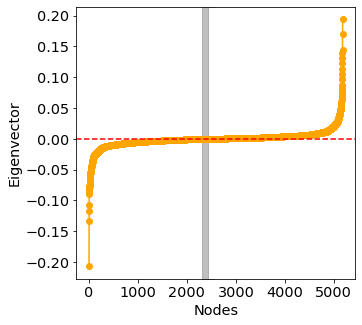

In [430]:
ax = e.plot_vector(eigen_id = 'eig_0', sorted=True,figure_name='most_collective')
#ax.fill_betweenx(range(-1,2),2000,3000)

In [78]:
d= e.gnm.getEigvecs()[:,0]
d

array([-0.00054077, -0.00057169, -0.000566  , ..., -0.00056117,
       -0.00068606, -0.00071638])

In [83]:
len(np.abs(d)[np.abs(d)<np.quantile(np.abs(d),0.05)])

260

[5100 5099 5098 5097 5096 5095 5094 5093 5092 5091 5101 5090 5102 5103
 5089 5104 5105 5088 5087 5086 5085 5084 5083 5082 5081 5080 5079 5106
 5078 5077 5076 5075 5074 5107 5073 5108 5072 5071 5070 5069 5068 5067
 5066 5065 5064 5063 5109 5062 5061 5060 5059 5110 5058 5057 5056 5055
 5111 5054 5053 5052 5051 5050 5049 5048 5047 5046 5045 5044 5043 5042
 5041 5040 5112 5039 5038 5037 5036 5035 5034 5033 5032 5031 5030 5029
 5028 5027 5026 5025 5024 5023 5022 5021 5020 5019 5018 5017 5016 5113
 5015 5014 5013 5012 5011 5010 5009 5008 5007 5006 5005 5004 5003 5002
 5001 5000 4999 4998 4997 4996 4995 4994 4993 4992 4991 4990 4989 4988
 4987 4986 4985 4984 4983 4982 4981 4980 4979 4978 4977 4976 5114 5115
 4975 4974 4973 4972 4971 4970 4969 4968 4967 4966 4965 4964 4963 4962
 4961 5116 4960 4959 4958 4957 4956 4955 4954 4953 4952 4951 4950 4949
 4948 4947 4946 4945 4944 4943 4942 4941 4940 4939 4938 4937 4936 4935
 4934 4933 4932 4931 5117 4930 4929 4928 4927 4926 4925 4924 4923 4922
 4921 

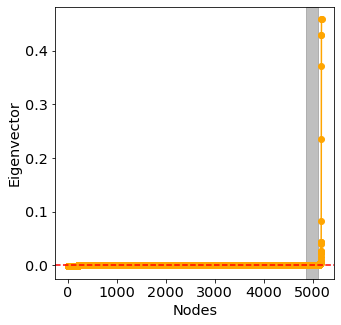

In [77]:
src.visualize.plot_vector(,sorted=True,figure_path='../reports/figures/')

In [74]:
e.save()

In [76]:
e

In [109]:
arr_nodegseq, rewire_df_nodegseq,e_list = simulate_rewire(e.graph_gc,sim_num=5,nodegseq=True)


  0%|          | 0/10 [00:00<?, ?it/s]@> 5182 modes were calculated in 32.15s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 17.5s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 5.7s.
@> Perturbation response scanning completed in 55.6s.

 10%|█         | 1/10 [03:58<35:48, 238.69s/it]@> 5182 modes were calculated in 32.66s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 17.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 5.4s.
@> Perturbation response scanning completed in 56.4s.

 20%|██        | 2/10 [07:58<31:52, 239.11s/it]@> 5182 modes were calculated in 32.54s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 18.3s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 5.5s.
@> Perturbation response scanning completed in 56.9s.

 30%|███       | 3/10 [11:58<27:54, 239.15s/it]@> 5182 modes were calculated in 33.73s.

In [435]:
e_list[1].plot_collectivity(figure_name='coll_rewire',figsize=(5,5))

IndexError: list index out of range

In [439]:
arr_nodegseq, rewire_df_nodegseq,e_list = simulate_rewire(e.graph_gc,sim_num=1)#,nodegseq=True,random_network_type='er')


  0%|          | 0/1 [00:00<?, ?it/s]@> 5182 modes were calculated in 32.81s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 14.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 4.0s.
@> Perturbation response scanning completed in 46.9s.

100%|██████████| 1/1 [04:15<00:00, 255.85s/it]


In [436]:
e_list

In [115]:
len(e_list[0].gnm.getEigvals())

5182

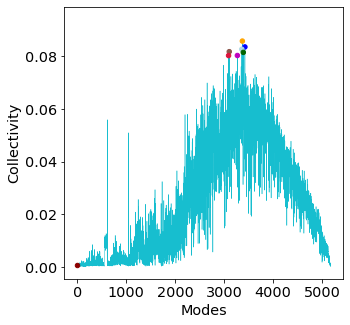

In [440]:
e_list[0].plot_collectivity(figure_name='coll_rewire',figsize=(5,5))

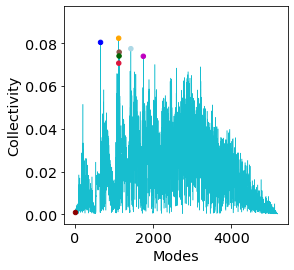

In [122]:
e.plot_collectivity()

In [139]:
e.simulate_rewire(nodegseq=True,sim_num=1,random_network_type='er')


  0%|          | 0/1 [00:00<?, ?it/s]@> 5182 modes were calculated in 32.31s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 17.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 5.7s.
@> Perturbation response scanning completed in 55.0s.

100%|██████████| 1/1 [1:10:07<00:00, 4207.72s/it]


In [140]:
e.rewire_df_nodegseq

,eff_deg_pearson,sens_deg_pearson,eff_deg_spearman,sens_deg_spearman,eff_btw_pearson,sens_btw_pearson,eff_btw_spearman,sens_btw_spearman,eff_trans_pearson,sens_trans_pearson,eff_trans_spearman,sens_trans_spearman
0,0.995647,-0.997414,0.995256,-0.999414,0.997175,-0.993703,0.997673,-0.997846,0.019276,0.007597,0.020196,0.004775


In [150]:
e.df.iloc[1:100,:]

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr
1,aac1,2,0.006890,0.003249,-0.000683,-0.011340,-0.000827,-0.002652,-0.002282,-0.001394,0.089499,1.181472,0.000021,0.000000,3.386090e-07,0.194783
2,qdr2,12,0.002414,0.000655,0.001012,-0.003385,-0.000754,0.004273,0.001614,0.001941,2.547009,0.573135,0.003090,0.030303,5.992641e-06,0.227380
3,dfg10,7,-0.002577,0.008337,0.001965,-0.000632,-0.000387,-0.001163,-0.001538,0.009146,0.471913,0.456930,0.000589,0.142857,2.534167e-06,0.222910
4,aac3,2,0.012193,0.011829,-0.003019,0.000688,0.003176,0.003662,0.002198,-0.002099,0.039365,0.962134,0.000021,0.000000,2.603545e-07,0.203383
5,pet309,31,-0.001084,0.002386,0.001404,0.000377,-0.000724,-0.006522,0.000868,-0.002409,3.546404,0.773763,0.010189,0.079570,1.299253e-05,0.247068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,prp18-ts,39,0.004179,0.002159,0.003089,0.009327,0.009724,0.001865,-0.002777,-0.002318,3.690453,2.030836,0.002316,0.547908,2.600647e-03,0.235310
96,prp2-1,40,0.005037,0.001944,-0.001166,0.009732,0.010180,-0.000012,-0.001952,-0.003611,3.551180,2.449985,0.000492,0.664103,3.001689e-03,0.235129
97,prp22-1,38,0.005241,0.000610,-0.000720,0.006227,0.005848,0.001297,-0.006450,-0.001873,2.494016,1.536345,0.004081,0.436700,1.816703e-03,0.240252
98,prp28-101,65,0.004844,0.001903,-0.001486,0.009118,0.009617,0.000471,-0.001067,-0.003698,8.116129,2.479611,0.001008,0.515385,6.598699e-03,0.245139


In [271]:
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.anno.gaf_reader import GafReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS



../data/raw/ontology/go-basic.obo: fmt(1.2) rel(2019-06-01) 47,444 GO Terms
HMS:0:00:05.354117 119,640 annotations READ: ../data/raw/ontology/sgd.gaf 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 83%  4,811 of  5,813 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 88%  5,097 of  5,813 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 72%  4,168 of  5,813 population items found in association


In [493]:
go_findenrichment

<function src.utils.go_findenrichment(query, outname=None, background='../data/raw/ontology/sgd_costanzogenes', species='yeast', **kwargs)>

In [278]:
go_results = []
from tqdm import tqdm
for i in tqdm(range(1000)):
    eig_id = e.coll_index_sorted[i]
    eig_vec = e.gnm.getEigvecs()[:,eig_id]
    query = combined_df.iloc[np.argsort(np.abs(eig_vec)),:].loc[:,'Systematic gene name'].values[:260]

    #print(geneid2name)
    query_gene_ids = sgd_info[sgd_info.iloc[:,3].isin(query)].iloc[:,0].values.tolist()

    goea_results_all = goeaobj.run_study(query_gene_ids, prt=None)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    go_results.append(goea_results_sig)
    #s, q, geneid2name = go_findenrichment(None,)
#go = pd.read_csv('tmp.tsv','\t')
#go


 29%|██▉       | 293/1000 [41:44<1:40:59,  8.57s/it]


 58%|█████▊    | 579/1000 [1:22:36<59:31,  8.48s/it]


 87%|████████▋ | 871/1000 [2:04:12<18:33,  8.63s/it]


100%|██████████| 1000/1000 [2:22:26<00:00,  8.55s/it]


In [297]:
eig_id = e.coll_index_sorted[-2]
eig_vec = e.gnm.getEigvecs()[:,eig_id]
query = combined_df.iloc[np.argsort(np.abs(eig_vec)),:].loc[:,'Systematic gene name'].values[:260]

#print(geneid2name)
query_gene_ids = sgd_info[sgd_info.iloc[:,3].isin(query)].iloc[:,0].values.tolist()

goea_results_all = goeaobj.run_study(query_gene_ids, prt=None)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]



In [470]:
goea_results_all[0].get_prtflds_default()

['GO',
 'NS',
 'enrichment',
 'name',
 'ratio_in_study',
 'ratio_in_pop',
 'p_uncorrected',
 'depth',
 'study_count',
 'p_fdr_bh',
 'study_items']

In [474]:
[i.get_field_values(goea_results_all[0].get_prtflds_default()) for i in goea_results_all[0:4]]

[['GO:0008152',
  'BP',
  'e',
  'metabolic process',
  '12/255',
  '91/5813',
  0.0005609653379403442,
  1,
  12,
  0.9691641886657631,
  'S000000288, S000000888, S000002808, S000003222, S000003436, S000004248, S000004369, S000004921, S000004982, S000005662, S000005716, S000006264'],
 ['GO:0045944',
  'BP',
  'e',
  'positive regulation of transcription by RNA polymerase II',
  '20/255',
  '209/5813',
  0.0008402094949228802,
  11,
  20,
  0.9691641886657631,
  'S000000199, S000000842, S000001048, S000001746, S000001772, S000001807, S000002264, S000002480, S000002530, S000002621, S000002871, S000003039, S000003221, S000003712, S000003720, S000004970, S000005432, S000005476, S000005831, S000005937'],
 ['GO:0050821',
  'BP',
  'e',
  'protein stabilization',
  '4/255',
  '11/5813',
  0.0009348850694525046,
  4,
  4,
  0.9691641886657631,
  'S000002575, S000003331, S000004798, S000006161'],
 ['GO:0015937',
  'BP',
  'e',
  'coenzyme A biosynthetic process',
  '3/255',
  '6/5813',
  0.001

In [463]:
help(goea_results_all[0])

Help on GOEnrichmentRecord in module goatools.go_enrichment object:

class GOEnrichmentRecord(builtins.object)
 |  GOEnrichmentRecord(goid, **kwargs)
 |  
 |  Represents one result (from a single GOTerm) in the GOEnrichmentStudy
 |  
 |  Methods defined here:
 |  
 |  __init__(self, goid, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self, indent=False)
 |      Return str(self).
 |  
 |  get_field_values(self, fldnames, rpt_fmt=True, itemid2name=None)
 |      Get flat namedtuple fields for one GOEnrichmentRecord.
 |  
 |  get_indent_dots(self)
 |      Get a string of dots ("....") representing the level of the GO term.
 |  
 |  get_method_name(self)
 |      Return name of first method in the method_flds list.
 |  
 |  get_prtflds_all(self)
 |      When converting to a namedtuple, get all possible fields in their original order.
 |  
 |  get_prtflds_default(self)
 |      Get default fi

In [307]:
import os

fls  = os.listdir('../data/interim/go_results/')

import re

fls.sort(key=lambda f: int(re.sub('\D', '', f)))

go_res = [pd.read_csv(f"../data/interim/go_results/{x}",'\t') for x in fls]

In [386]:
[gr for gr in go_res if gr.shape[0]==162][0]

,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items
0,GO:0007049,BP,e,cell cycle,74/214,288/5813,3.462185e-45,2,74,1.076739e-41,"YAL034W-A, YBL023C, YBL034C, YBR087W, YBR107C,..."
1,GO:0006260,BP,e,DNA replication,36/214,76/5813,2.142215e-32,6,36,3.331145e-29,"YAR007C, YBL023C, YBL035C, YBR060C, YBR087W, Y..."
2,GO:0051301,BP,e,cell division,49/214,182/5813,2.724202e-30,2,49,2.824089e-27,"YAL034W-A, YBL034C, YBR107C, YBR135W, YBR211C,..."
3,GO:0007059,BP,e,chromosome segregation,26/214,63/5813,1.242389e-21,2,26,8.224451e-19,"YAL034W-A, YBR156C, YDL003W, YDL028C, YDL139C,..."
4,GO:0006270,BP,e,DNA replication initiation,20/214,32/5813,1.322259e-21,7,20,8.224451e-19,"YBL023C, YBL035C, YBR060C, YBR202W, YDL017W, Y..."
...,...,...,...,...,...,...,...,...,...,...,...
157,GO:0003777,MF,e,microtubule motor activity,4/214,9/5813,1.945567e-04,8,4,1.980489e-02,"YEL061C, YGL216W, YMR198W, YPR141C"
158,GO:0016251,MF,e,RNA polymerase II general transcription initia...,5/214,16/5813,2.021939e-04,3,5,1.980489e-02,"YDR145W, YDR167W, YGR274C, YML098W, YMR005W"
159,GO:0017116,MF,e,single-stranded DNA helicase activity,4/214,10/5813,3.149356e-04,11,4,2.937899e-02,"YBL023C, YBR202W, YGL201C, YLR274W"
160,GO:0008310,MF,e,single-stranded DNA 3'-5' exodeoxyribonuclease...,3/214,5/5813,4.657867e-04,9,3,3.967288e-02,"YJR006W, YJR043C, YNL262W"


In [526]:
for i in go_res[78].study_items:
    print(i)

YBL026W, YBL074C, YBR065C, YBR119W, YBR152W, YBR237W, YCR063W, YDL030W, YDL043C, YDL087C, YDL098C, YDL209C, YDR163W, YDR235W, YDR240C, YDR243C, YDR378C, YDR416W, YFR005C, YGL120C, YGL174W, YGR013W, YGR278W, YIR005W, YJL203W, YJR050W, YKL012W, YKL074C, YKL173W, YLR116W, YLR117C, YLR275W, YML049C, YMR223W, YMR268C, YNL147W, YNL245C, YNR011C, YOR159C, YOR308C, YPL151C, YPL213W, YPR057W, YPR094W, YPR101W, YPR178W, YPR182W
YBL026W, YBR065C, YBR119W, YBR152W, YBR237W, YCR020C-A, YCR063W, YDL030W, YDL098C, YDL209C, YDR163W, YDR235W, YDR240C, YDR243C, YDR378C, YDR416W, YFR005C, YGL174W, YGR013W, YGR278W, YIR005W, YJL203W, YKL012W, YKL173W, YLR116W, YLR117C, YLR298C, YML029W, YML049C, YMR240C, YNL147W, YNL245C, YOR159C, YOR308C, YOR319W, YPL151C, YPL213W, YPR094W, YPR101W, YPR178W, YPR182W
YBL026W, YBL074C, YBR065C, YBR119W, YBR152W, YBR237W, YCR063W, YDL030W, YDL043C, YDL087C, YDL098C, YDL209C, YDR163W, YDR235W, YDR240C, YDR243C, YDR378C, YDR416W, YFR005C, YGL120C, YGL174W, YGR013W, YGR278W, Y

In [528]:
import itertools as itr
#a = 
for i,gr in enumerate(go_res):
    print(i)
    
#np.unique(a)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535


AttributeError: 'float' object has no attribute 'split'

In [529]:
go_res_dd = dict(zip([e.coll[i] for i in e.coll_index_sorted],[len(np.unique(list(itr.chain(*[i.split(', ') for i in gr.study_items.values if pd.isna(i)==False])))) for gr in go_res]))

In [530]:
for i in range(5182):
    if i not in go_res_dd.keys():
        go_res_dd[i]=0


In [532]:
go_res_df = pd.DataFrame(go_res_dd.items(),columns=['id','go'])
go_res_df = go_res_df.sort_values(by='id')
#go_res_df['coll']=[e.coll[i] for i in e.coll_index_sorted]
#go_res_df['lambda']=[e.gnm.getEigvals()[i] for i in e.coll_index_sorted]
go_res_df#.iloc[8:9,:]

,id,go
2829,0.000000,0
2828,0.016097,4
2827,0.016105,9
2826,0.016108,8
2825,0.016110,5
...,...,...
8006,5177.000000,0
8007,5178.000000,0
8008,5179.000000,0
8009,5180.000000,0


In [415]:
go_res_df.loc[go_res_df.go==162]

,id,go,coll,lambda
2508,4603,162,0.002342,0.359601


[2602 2603 2604 2601 2600 2599 2598 2597 2596 2595 2594 2605 2606 2593
 2607 2608 2609 2610 2592 2591 2590 2611 2612 2613 2589 2614 2588 2587
 2586 2615 2585 2584 2583 2582 2581 2616 2580 2579 2617 2578 2577 2576
 2575 2574 2573 2572 2618 2619 2571 2620 2570 2569 2568 2621 2567 2622
 2566 2623 2624 2565 2625 2626 2627 2628 2564 2629 2630 2631 2632 2563
 2562 2633 2634 2561 2560 2635 2559 2636 2637 2638 2558 2557 2639 2640
 2556 2641 2555 2642 2643 2644 2645 2646 2647 2648 2554 2649 2650 2553
 2552 2551 2550 2651 2652 2653 2654 2549 2548 2655 2656 2657 2547 2546
 2545 2544 2543 2658 2659 2542 2541 2660 2661 2540 2539 2662 2538 2537
 2663 2664 2536 2665 2535 2534 2666 2533 2667 2668 2669 2670 2671 2672
 2532 2673 2531 2674 2675 2530 2529 2528 2527 2526 2525 2524 2523 2676
 2522 2521 2677 2520 2519 2678 2679 2680 2681 2518 2682 2683 2684 2517
 2685 2516 2686 2515 2514 2513 2687 2688 2689 2690 2691 2512 2511 2510
 2692 2509 2508 2507 2693 2694 2506 2695 2696 2697 2698 2699 2700 2701
 2702 

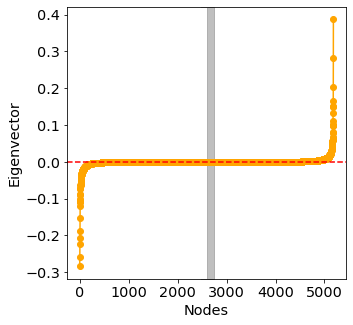

In [426]:
plot_vector(e.gnm.getEigvecs()[:,4603],figure_path='../reports/figures/pcc_0511/',sorted=True)

In [427]:
e.coll[4603]

0.00915906339541712

KeyError: 'coll'

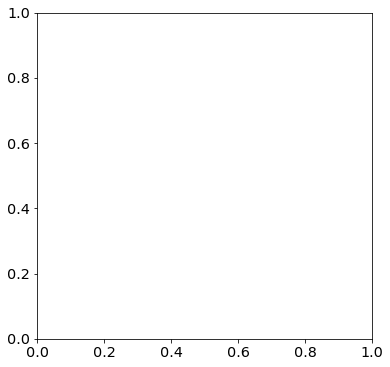

In [533]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(np.log1p(go_res_df['coll']),go_res_df.go, s=10)
ax.set_xlabel('Collectivity')
ax.set_ylabel('Number of significant GO terms')
#ax.set_xlim(0.1,-0.01)
fig.savefig('../reports/figures/pcc_0511/coll_goterm.png')

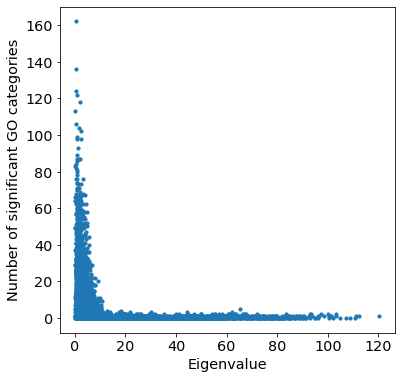

In [456]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(go_res_df['lambda'], go_res_df.go, s=10)
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Number of significant GO categories')
#ax.set_xlim(0.1,-0.01)
fig.savefig('../reports/figures/pcc_0511/eigenvalue_numof_go.png')
#go_res_df.plot.scatter('lambda','go',c='coll')

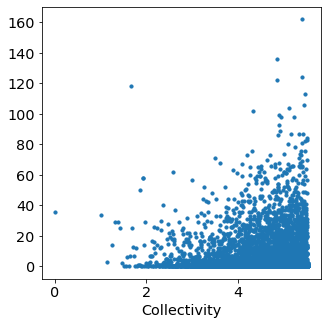

In [379]:
lists = sorted(go_res_dd.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots()
ax.scatter(np.power(x,1/5), y, s=10)
ax.set_xlabel('Collectivity')
#ax.set_xlim(0.1,-0.01)
plt.show()

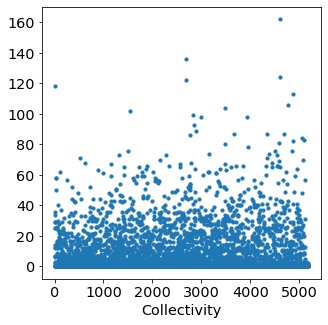

In [345]:
plt.scatter(x, y, s=10)
plt.xlabel('Collectivity')
plt.show()

In [488]:
go_df_n = pd.DataFrame([[getattr(i,x) for x in i.get_prtflds_default()] for i  in q], columns=q[0].get_prtflds_default())

In [489]:
orf_names = []
for i in go_df_n.study_items:
    orf_names.append([geneid2name[_id] for _id in i])

#go_df_n.study_items = orf_names

In [491]:
go_df_n.study_items = orf_names


In [492]:
go_df_n

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items
0,GO:0006260,BP,e,DNA replication,"(24, 236)","(76, 5813)",7.326698e-16,6,24,2.278603e-12,"[YML065W, YBR202W, YDL164C, YJR006W, YNL102W, ..."
1,GO:0006270,BP,e,DNA replication initiation,"(13, 236)","(32, 5813)",1.026240e-10,7,13,1.595803e-07,"[YDR052C, YGL201C, YNL102W, YLL004W, YBR060C, ..."
2,GO:0006267,BP,e,pre-replicative complex assembly involved in n...,"(10, 236)","(19, 5813)",6.749909e-10,9,10,6.997405e-07,"[YGL201C, YBR060C, YLL004W, YML065W, YBR202W, ..."
3,GO:0006273,BP,e,lagging strand elongation,"(7, 236)","(9, 5813)",5.596927e-09,9,7,4.351611e-06,"[YNL102W, YBR088C, YJR043C, YDL164C, YJR006W, ..."
4,GO:0006281,BP,e,DNA repair,"(24, 236)","(180, 5813)",1.962263e-07,7,24,1.091044e-04,"[YPL262W, YPR164W, YDL164C, YER173W, YLR288C, ..."
5,GO:0006289,BP,e,nucleotide-excision repair,"(10, 236)","(31, 5813)",2.104907e-07,8,10,1.091044e-04,"[YBR088C, YJR043C, YER173W, YER171W, YAR007C, ..."
6,GO:0033314,BP,e,mitotic DNA replication checkpoint,"(6, 236)","(9, 5813)",3.189162e-07,11,6,1.416899e-04,"[YDR052C, YBR274W, YML065W, YER173W, YJL194W, ..."
7,GO:0007049,BP,e,cell cycle,"(31, 236)","(288, 5813)",4.336748e-07,2,31,1.685911e-04,"[YPR164W, YFL034C-B, YOR326W, YER173W, YBR202W..."
8,GO:0006272,BP,e,leading strand elongation,"(6, 236)","(12, 5813)",3.163570e-06,9,6,1.093189e-03,"[YNL102W, YBR088C, YJR043C, YOL094C, YOR217W, ..."
9,GO:0007118,BP,e,budding cell apical bud growth,"(7, 236)","(19, 5813)",5.519207e-06,3,7,1.716473e-03,"[YER149C, YFL034C-B, YNL079C, YOR326W, YIL129C..."


In [245]:
[[x for x in go_df['study_items']][i] for i in range(len(go_df))]

[{'S000001838', 'S000002402', 'S000003916', 'S000005275', 'S000005525'},
 {'S000000170',
  'S000000659',
  'S000001444',
  'S000003142',
  'S000003510',
  'S000004107',
  'S000004315',
  'S000004826',
  'S000005189',
  'S000006261'},
 {'S000000659',
  'S000001444',
  'S000003142',
  'S000003510',
  'S000004107',
  'S000004315',
  'S000004826',
  'S000005189',
  'S000005846'},
 {'S000000170',
  'S000000659',
  'S000001444',
  'S000003142',
  'S000003510',
  'S000004107',
  'S000004315',
  'S000004826',
  'S000005189',
  'S000005846',
  'S000006261'},
 {'S000000659',
  'S000001444',
  'S000003142',
  'S000003510',
  'S000004107',
  'S000004315',
  'S000004826',
  'S000005189',
  'S000006261'},
 {'S000003142', 'S000003510', 'S000004315', 'S000005189'},
 {'S000001838', 'S000002402', 'S000003916', 'S000005275', 'S000005525'}]

In [ ]:
[geneid2name[x] for x in q[0].study_items]

In [536]:
print(1)

1


In [551]:
eig = e.gnm.getEigvecs()[:,0]
eig_0 = e.gnm.getEigvecs()[:,1116]

(-0.001, 0.001)

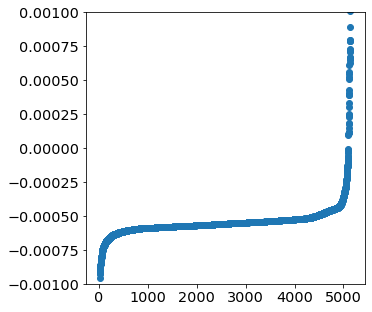

In [581]:
eig_sorted = sorted((eig))
plt.plot(sorted(eig_sorted),'o')
plt.ylim(-0.001,0.001)

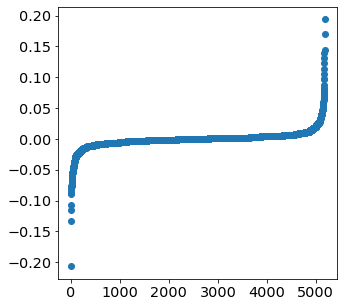

In [568]:
eig_0_sorted = sorted(np.round(eig_0,3))
plt.plot(sorted(eig_0_sorted),'o')

In [575]:
len([i for i in eig_sorted if np.abs(i) <0.0010])

669

In [576]:
len([i for i in eig_0_sorted if np.abs(i) <0.0010])

656

In [588]:
np.sum(eig_0<0)

2437

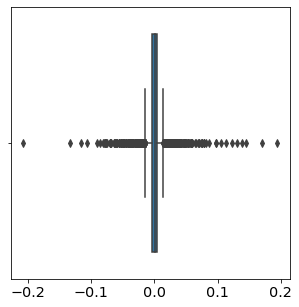

In [598]:
sns.boxplot(eig_0)#,bins=10000)